In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.abspath(os.path.join("../..")))

In [3]:
df = pd.read_csv("../data/AdSmartABdata.csv")

In [4]:
print("The data has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The data has 8077 rows and 9 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [6]:
# Take a look at the first few rows
df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [7]:
# number of unique values in each column
for col in df.columns:
    n = df[col].nunique()
    print("{} has {} unique values".format(col, n))

auction_id has 8077 unique values
experiment has 2 unique values
date has 8 unique values
hour has 24 unique values
device_make has 270 unique values
platform_os has 3 unique values
browser has 15 unique values
yes has 2 unique values
no has 2 unique values


### auction_id has all unique values, as it should

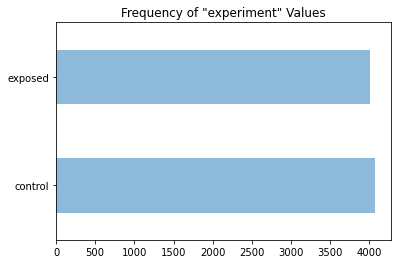

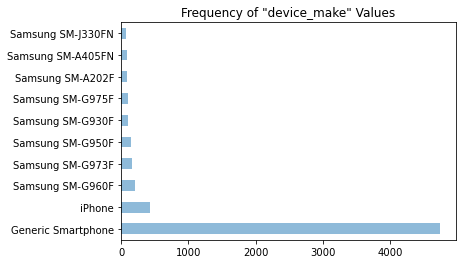

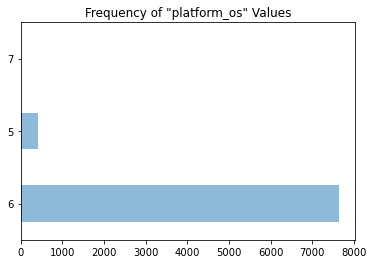

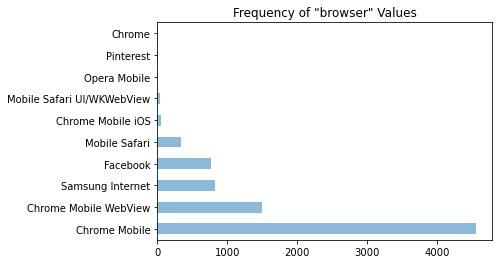

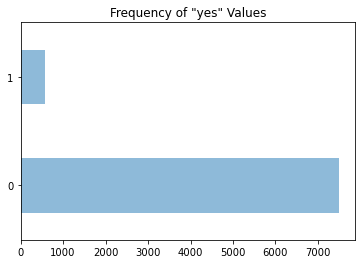

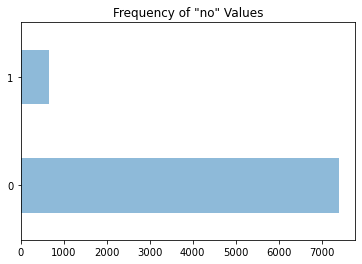

In [18]:
# plot value frequency of some of the variables

columns = ['experiment', 'device_make', 'platform_os', 'browser', 'yes', 'no']

for col in columns:
    df[col].value_counts().head(10).plot(kind= 'barh')
    plt.title("Frequency of \"{}\" Values".format(col))
    plt.show()

### It is clear from the plots above that many users have not answered, i.e. they have values yes=0 & no=0
### 1. Extract the users who answered 
### 2. Look for patterns in the data of users who didn't answer

In [9]:
index_NoAnswer = (df['yes']==0) & (df['no']==0) 

Answered = df[~ index_NoAnswer]
NotAnswered= df[index_NoAnswer]

In [11]:
# lets compare the two datasets
total_num, ans_num, noa_num = df.shape[0], Answered.shape[0], NotAnswered.shape[0]

print("Of the total {} users, {} ({:.1f}% of users) have answered and {} ({}% of useres)\
have not answered".format(total_num,ans_num,(ans_num*100/total_num), noa_num, (noa_num*100/total_num)))

Of the total 8077 users, 1243 (15.4% of users) have answered and 6834 (84.61062275597375% of useres)have not answered


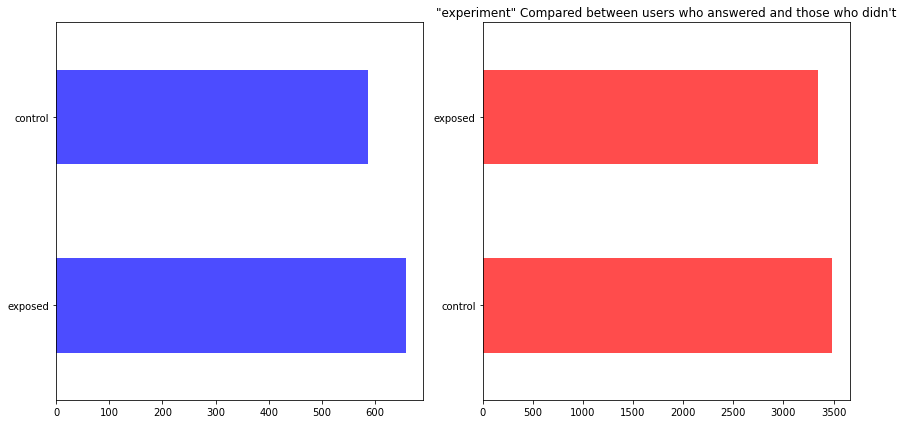

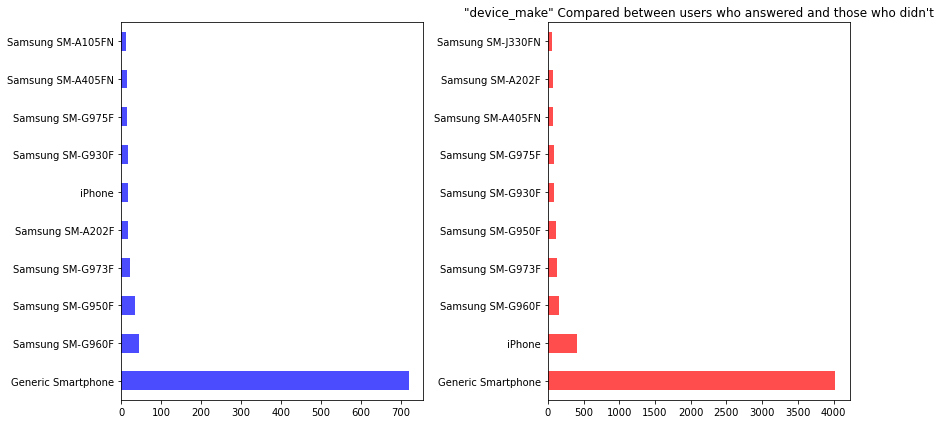

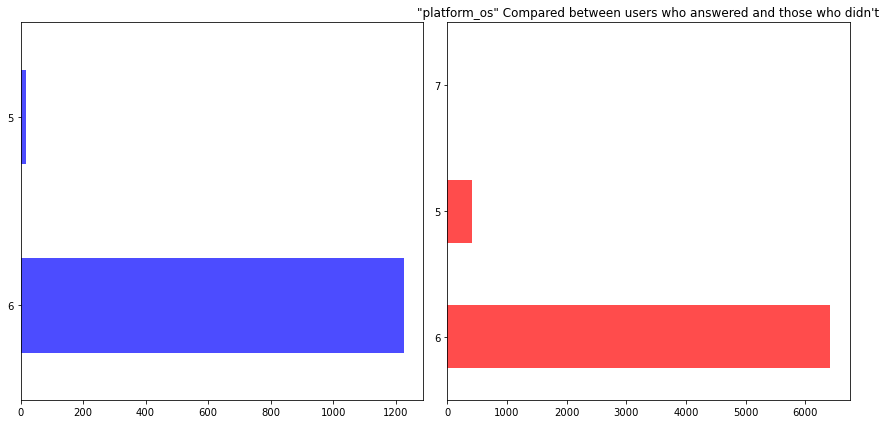

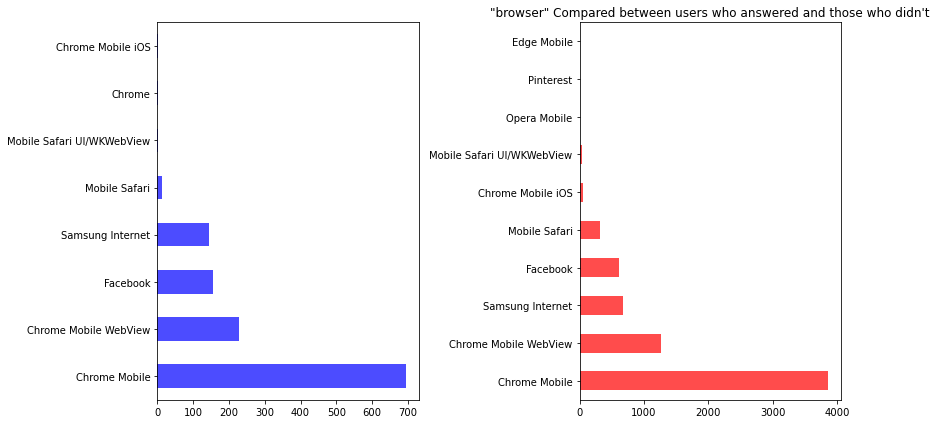

In [48]:
# plot value frequency of some of the variables

columns = ['experiment', 'device_make', 'platform_os', 'browser']

for col in columns:
    _, axes = plt.subplots(1,2, figsize= (12,6))
    Answered[col].value_counts().head(10).plot.barh(ax= axes[0], alpha=0.7, color ='blue')
    NotAnswered[col].value_counts().head(10).plot.barh(ax= axes[1], alpha=0.7, color ='red')
    plt.title("\"{}\" Compared between users who answered and those who didn\'t".format(col))
    plt.tight_layout()
    plt.show()

#### So, no striking difference arises  between the data of users who answered and users who didn't answer.

In [ ]:
#save both sets of data for further analysis

Answered.to_csv("../data/AdSmartClean_data.csv", index=False)
NotAnswered.to_csv("../data/NoResponse_data.csv", index=False)